# Surface problems

## Line in plane

### Cell orientation for line in plane

In [ ]:
def set_cell_orientations(mesh):
    from ufl.classes import ReferenceGrad
    import firedrake as fd

    V0 = fd.FunctionSpace(mesh, 'DG', 0)
    X = fd.SpatialCoordinate(mesh)
    flag = fd.Function(V0)
    flag.interpolate(fd.dot(X, fd.as_vector((-ReferenceGrad(X)[1, 0], ReferenceGrad(X)[0, 0]))))
    cell_orientations = fd.Function(V0, dtype=np.int32)
    cell_orientations.dat.data[:] = (flag.dat.data_ro < 0)
    mesh.topology._cell_orientations = cell_orientations


def plot_orientations_1d(mesh):
    import matplotlib.pyplot as plt

    plt.figure(figsize=[4, 4])
    Vc = mesh.coordinates.function_space()
    cell_orientations = mesh.cell_orientations()
    for i, index in enumerate(Vc.cell_node_list):
        coord = mesh.coordinates.dat.data_ro_with_halos[index].real
        o = cell_orientations.dat.data_ro_with_halos[i]

        _x = coord[:, 0]
        _y = coord[:, 1]
        if o > 1/2:
            plt.arrow(_x[0], _y[0], (_x[1]-_x[0])/2, (_y[1]-_y[0])/2, head_width=0.05, head_length=0.05, fc='k', ec='k')
        else:
            plt.arrow(_x[1], _y[1], (_x[0]-_x[1])/2, (_y[0]-_y[1])/2, head_width=0.05, head_length=0.05, fc='k', ec='k')
    bbox = plt.axis('equal')

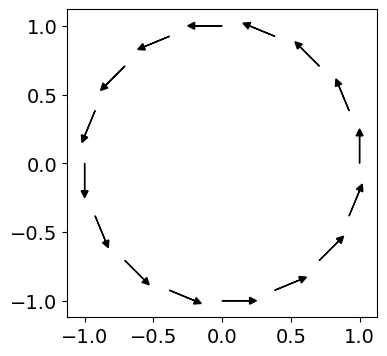

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt

# mesh = Mesh("gmsh/circle_1d.msh", dim=2)
# set_cell_orientations(mesh) 

mesh = CircleManifoldMesh(16)
x = SpatialCoordinate(mesh)
# mesh.init_cell_orientations(x)

set_cell_orientations(mesh)

V = VectorFunctionSpace(mesh, 'CG', degree=1)
n_h = Function(V, name='n_h')
n_h.project(as_vector([-x[1], x[0]]))

plt.figure(figsize=[4, 4])
for coord, vector in zip(mesh.coordinates.dat.data_ro.real, n_h.dat.data_ro.real):
    plt.arrow(coord[0], coord[1], 0.2*vector[0], 0.2*vector[1], head_width=0.05, head_length=0.05, fc='k', ec='k')
bbox = plt.axis('equal')

In [ ]:
def test_cell_orientation_curve():
    m = CircleManifoldMesh(3)
    x = SpatialCoordinate(m)
    # m.init_cell_orientations(x)
    set_cell_orientations(m)
    
    U = VectorFunctionSpace(m, 'CG', degree=1)
    V = VectorFunctionSpace(m, 'CG', degree=2)
    f = project(CellNormal(m), U)

    g = interpolate(f, V)
    h = project(f, V)

    assert abs(g.dat.data - h.dat.data).max() < 1e-2
    
    print(g.dat.data - h.dat.data)

In [ ]:
test_cell_orientation_curve()

[[ 0.00000000e+00 -2.22044605e-16]
 [ 1.22124533e-15  1.72988663e-17]
 [-2.77555756e-16  7.77156117e-16]
 [ 1.11022302e-16  4.36425264e-17]
 [-3.88578059e-16 -7.77156117e-16]
 [-5.55111512e-17  5.55111512e-17]]


## Surface in 3D space